<a href="https://colab.research.google.com/github/Marcozambeli/General/blob/main/Trabalho_2_EST_SE_Marco_Antonio_Zambeli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ENE057A - Estabilidade em Sistemas Elétricos de Potência Módulo 1 - Geradores Síncronos
###Trabalho 2 - Marco Antonio de O. Zambeli 201369026c

Instruções:

• Data de submissão: 18/02/2021

• Resolução do trabalho deve ser individual submetida via Google Classroom.

• A resolução deve ser realizada em um notebook do Google Colab,

• Os tanto o raciocínio como os resultados dos cálculos devem ser devidamente explicados e comentados.





###1. Seja o gerador de 144,6 [MVA], 18 [kV] e 60 [Hz] cujos parâmetros elétricos e mecânicos estão relacionados abaixo. Valores por unidade são baseados na potência e tensão nominais da máquina.
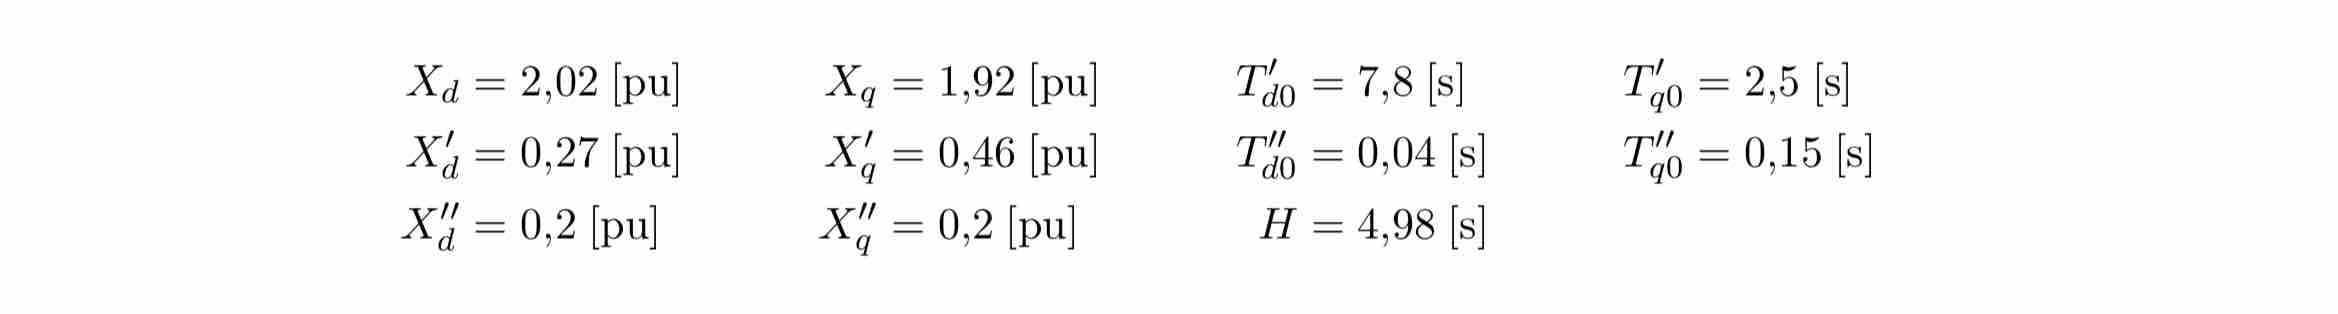
###Assumindo que a máquina opere com potência aparente nominal e fator de potência 0,9 (indutivo) conectada a uma barra infinita com tensão nominal, calcule:


In [ ]:
!pip install control

In [ ]:
# 1º bloco de código para importar bibliotecas e declarar as variáveis do caso em análise:

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import math
import cmath

# Dados da máquina:
Sb = 144.6    # [MVA]
Vb = 18       # [kV]
f  = 60        # [Hz]
fp = 0.9

# Reatâncias dos eixos direto e em quadratura
Xd = 2.02
X1d = 0.27
X2d = 0.2
Xq = 1.92
X1q = 0.46
X2q = 0.2

# Constantes de tempo de circuito aberto, em segundos
T1d0 = 7.8
T2d0 = 0.04
T1q0 = 2.5
T2q0 = 0.15

# Constante de inércia do eixo [s]
H = 4.98   

# Constante de amortecimento [pu]
D = 0

# Resistência de armadura
Ra = 0

# Velocidade de rotação
wb = 2*np.pi*f 


###(a) Corrente de armadura, tensão interna e ângulo de carga da máquina em regime permanente:

####Embasamento Teórico:
Primeiramente, analisa-se o circuito equivalente da máquina em regime permanente:



*Imagem retirada das notas de aula do prof Marcelo Tomim*

Inicialmente, calcula-se a relação entre as potências da máquina. De posse da potencia aparente e do fator de potência, fica viabilizado o uso do triângulo de potências para o cálculo daquelas ativa e reativa.

>Assim, pode-se lançar mão das seguites relações matemáticas:

$S = P + jQ$ ; $fp = 0,9 = cos(θ)$

>Das relações trigonométricas, tem-se também:

$P=S_b \cdot cos(\theta) $ ; $Q=S_b \cdot sin(\theta)$

>Em valores por unidade:

$P_{pu}= \frac{P}{S_b}$ ; $Q_{pu}= \frac{Q}{S_b}$

>A corrente de armadura pode ser calculada pela relação:

$I_a = (\frac{S}{V_t})^* = (\frac{P_{pu}+jQ_{pu}}{V_t})^* = (\frac{P_{pu}-jQ_{pu}}{V_t})$
, onde Vterminal = 1pu.


> O ângulo de carga da máquina em regime permanente é aquele referente à tensâo $E_q$, tal ângulo (definido como "**δ**") determina o posicionamento entre o eixo de quadatura e a referência, graças ao fato desse eixo estar em fase com a tensão $E_q$.

> O ângulo $δ$ pode ser encontrado pela resolução da malha do circuito equivalente visto anteriormente, assim define-se a equação abaixo para a tensao $E_q$, em módulo e fase:

$Ê_q=V_t+jX_q*Î_a-r_a*Î_a$ 

>A tensão interna $E_a$ pode também ser encontrada a partir da equação de malha do circuito equivalente para o regime permanente:

$Ê_a=Ê_q+j(X_d-X_q)*Î_d$




In [ ]:
# Início dos cálculos
#Primeiramente, encotra-se a corrente Ia
vt = 1                   #Tensão terminal(nominal)
theta = math.acos(fp) 
P = Sb*math.cos(theta)   #Pot ativa
Ppu = P/Sb               #Pot ativa em pu
Q = Sb*math.sin(theta)   #Pot reativa 
Qpu = Q/Sb               #Pot reativa em pu
S = complex(Ppu,Qpu)     #Pot Aparente em Pu 

#Cálculo da Corrente Ia:
Ia = (complex.conjugate(S)/vt)
Ia

(0.8999999999999999-0.4358898943540673j)

>**Com isso, a corrente de armadura é aproximadamente: $I_a=0,9-j0.436$ [pu]**





In [ ]:
#Nesse segundo bloco de código, encontra-se o ângulo δ

Eq = vt + complex(0,Xq)*Ia - Ra*Ia 
cmath.polar(complex(Eq))          #tensão Eq com módulo e fase


(2.521947103790961, 0.7548574829844482)

Assim, $E_q=2,522pu$ e $\delta=0,755 rad$


In [ ]:
#Transforma-se o ângulo de carga para graus, fazendo:
delta = (0.7548574829844482*180)/np.pi
delta

43.25014790887723

>**Logo, o ângulo de carga da máquina é $\delta=43,25º$**

In [ ]:
#O cálculo da Tensão interna vem do equacionamento do circuito como sugerido na teoria acima
Ea = Eq + j(Xd-Xq) * Id

NameError: ignored

###(b) Corrente de armadura nos eixos direto e em quadratura em regime permanente.

###(c) Tensa ̃o terminal nos eixos direto e em quadratura em regime permanente.


###(d) Tensão transitória nos eixos direto e em quadratura em regime permanente.


###(e) Compare as características de potência elétrica em função do ângulo de carga para os regimes permanente e transitório.

###(f) Determine as equações diferenciais que permitam a análise dessa má ́quina no seu período transitório. Inclua as condições iniciais apropriadas para as variáveis de estado consideradas.


###(g) Estime o tempo crítico de abertura de um curto-circuito trifásico franco nos terminais dessa máquina.